In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns


In [12]:
'''
Listing of attributes:

>50K, <=50K.

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
'''

n = ['age', 'work', 'fnlwgt', 'education', 'education-num', 'marl', 'occupation', 'relationship', 'race', 'sex', 'cg', 'cl', 'hw', 'na', '5k']

df = pd.read_csv('adult.data', index_col=False, names=n)


age              False
work             False
fnlwgt           False
education        False
education-num    False
marl             False
occupation       False
relationship     False
race             False
sex              False
cg               False
cl               False
hw               False
na               False
5k               False
dtype: bool

In [13]:
# df.head()
# df.describe()
# df.count()
# df.isnull().any()

<AxesSubplot:xlabel='race', ylabel='age'>

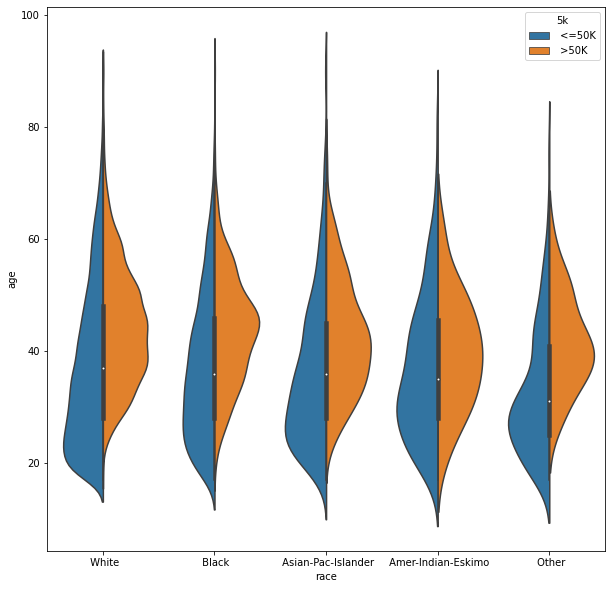

In [21]:
# sns.countplot(x='5k', data=df) # 영상에서는 sns.countplot('5k', data=df) -> 오류
# data training할 때 반반이 좋다고 함!

# sns.countplot(x='5k', hue='sex', data=df)

# sns.heatmap(df.corr(), annot=True, cmap='summer_r', linewidths=0.2) # 5k가 string이라서 corr를 확인하려면 변환 과정이 필요

# plt.figure(figsize=(10,10))
# sns.violinplot(x='race', y='age', hue='5k', data=df, split=True)

In [25]:
Y = df['5k'].values.tolist()

Y = [1 if i == ' <=50K' else 0 for i in Y]
Y = to_categorical(Y)
print(Y)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [34]:
# df.head()
X = df.drop(['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw', '5k'], axis=1)

# value_count로 먼저 확인해봐야 하는거 아닌가?
X = pd.get_dummies(X, drop_first=True)

# 근데 왜 분리했다가 다시 붙여? 바보야... 얘넨 숫자 데이터잖아!
X = pd.concat([X, df[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']]], axis=1)

# 너무 큰 숫자는 sclae 조정해야 함
scaler = MinMaxScaler()
X[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']] = scaler.fit_transform(X[['age', 'fnlwgt', 'education-num', 'cg', 'cl', 'hw']])
# 헐 간단하네...
X.head()

SyntaxError: invalid syntax (78732133.py, line 13)

In [39]:
# 굳이 이거 말고...
X_train = X[:-1000]
X_test = X[-1000:]

Y_train = Y[:-1000]
Y_test = Y[-1000:]

# X_train.shape # (31561, 100)
# X_test.shape # (1000, 100)
# Y_train.shape # (31561, 2)

In [45]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(100,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # training할때 accuracy 값도 구해라!
hist = model.fit(X_train, Y_train, epochs=5, validation_split=0.2) # 0.2%는 accuracy를 체크

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1024)              103424    
                                                                 
 dense_21 (Dense)            (None, 512)               524800    
                                                                 
 dense_22 (Dense)            (None, 128)               65664     
                                                                 
 dense_23 (Dense)            (None, 2)                 258       
                                                                 
Total params: 694,146
Trainable params: 694,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
789/789 [==============================] - 7s 9ms/step - loss: 0.4354 - accuracy: 0.8001 - val_loss: 0.3791 - val_accuracy: 0.8288
Epoch 2/5
789/789 [====================

{'loss': [0.43543770909309387, 0.3659144341945648, 0.3540385961532593, 0.3464222550392151, 0.34235063195228577], 'accuracy': [0.800102949142456, 0.8297290802001953, 0.8347195982933044, 0.838403046131134, 0.8404229879379272], 'val_loss': [0.379148006439209, 0.36085283756256104, 0.3516676425933838, 0.3434107303619385, 0.33860552310943604], 'val_accuracy': [0.8287660479545593, 0.8317757248878479, 0.8354189991950989, 0.8401710987091064, 0.8422303199768066]}


Text(0.5, 1.0, 'loss')

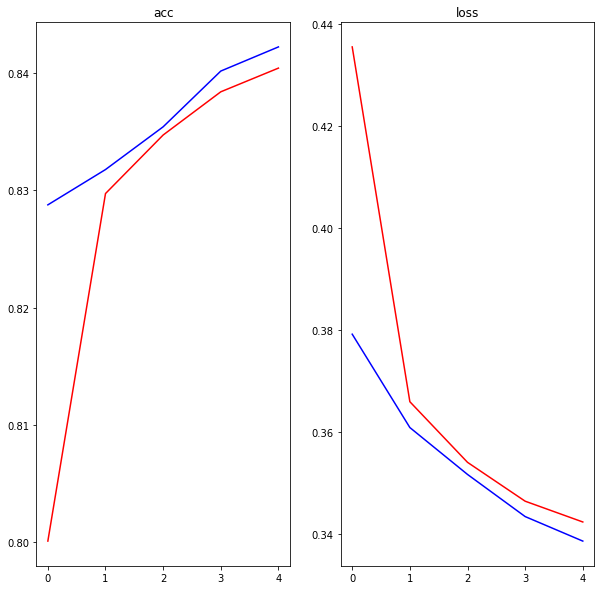

In [51]:
print(hist.history)

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color='r')
plt.plot(hist.history['val_accuracy'], color='b')
plt.title('acc')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

In [53]:
score = model.evaluate(X_test, Y_test)
print(score)

32/32 [==============================] - 0s 4ms/step - loss: 0.3593 - accuracy: 0.8140
[0.3592979609966278, 0.8140000104904175]


In [54]:
pred = model.predict(X_test)

print(pred[:10])
print(Y[:10])

32/32 [==============================] - 0s 4ms/step
[[0.87060773 0.12939228]
 [0.04945353 0.95054644]
 [0.4689623  0.5310376 ]
 [0.04363154 0.9563684 ]
 [0.8650542  0.13494581]
 [0.02042389 0.97957605]
 [0.01456764 0.9854324 ]
 [0.00723531 0.99276465]
 [0.33097494 0.66902506]
 [0.01713418 0.98286575]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
